a. Buffalo 311 Service Request Data https://data.buffalony.gov/Quality-of-Life/311-Service-Requests/whkc-e5vr

b. Buffalo Code Violations Data https://data.buffalony.gov/Quality-of-Life/Code-Violations/ivrf-k9vm

c. Copy of buffalo-clean.xlsx


In [1]:
import os
import sodapy
from sodapy import Socrata
import pandas as pd
import numpy as np
import geopandas as gpd

## import Buffalo 311 Service Request Data

In [2]:
urla="https://data.buffalony.gov/resource/whkc-e5vr.geojson?$limit=1000000"
#$where=open_date%20between%20%272018-01-01T00:00:00%27%20and%20%272020-06-01T00:00:00%27"
#?method=export&format=GeoJSON"
dfa= gpd.read_file(urla)
dfa.shape

(815272, 38)

socrata_domain='data.buffalony.gov'
socrata_dataset_identifier='whkc-e5vr'
app_token=os.environ.get('SODAPY_APPTOKEN')
client=Socrata(socrata_domain,app_token) 
dict=client.get(socrata_dataset_identifier,content_type='geojson?$limit=100000')
dfa=gpd.GeoDataFrame.from_features(dict)

In [3]:
pd.options.display.max_columns = None
dfa = dfa[dfa.geometry.notnull()]
dfa=dfa.to_crs('epsg:3857')
dfa.head()

,location_state,zip_code,city,location_zip,police_district,x_coordinate,subject,latitude,state,:@computed_region_kwzn_pe6v,neighborhood,:@computed_region_xbxg_7ifr,location_address,object_type,location_city,property_id,census_block,reason,longitude,:@computed_region_tmcg_v66k,:@computed_region_dwzh_dtk5,case_reference,:@computed_region_k9un_h6vm,:@computed_region_uh5x_q5mi,status,address_line_2,census_block_group,y_coordinate,census_tract,open_date,address_number,:@computed_region_fk4y_hpmh,type,:@computed_region_eziv_p4ck,address_line_1,closed_date,council_district,geometry
0,,14210,Buffalo,,District A,-8776279.628,Dept of Public Works,42.86892484168224,NY,19,UNKNOWN,21,,Property,,122.44-1-41,3014,Rodent Control,-78.83875036727827,5,2998,1000971968,None,260,Closed,None,3,5291981.0269,163,2019-05-01T10:39:00,43,4,Rodents (Req_Serv),68,WALTER,2019-05-09T12:20:00,FILLMORE,POINT (-8776289.546 5292042.105)
2,,14215,Buffalo,,District E,-8774717.503,Dept of Public Works,42.931429915813446,NY,11,UNKNOWN,6,,Property,,90.47-2-9,1015,Sanitation,-78.82435336976692,9,586,1000972245,None,30,Closed,None,1,5301545.2102,39.01,2019-05-02T10:57:00,614,2,Totes Replace (Req_Serv),45,WYOMING,2019-05-09T10:01:00,MASTEN,POINT (-8774686.879 5301540.598)
3,,14212,Buffalo,,District C,1080289.6,Dept of Public Works,42.88782703051763,NY,8,UNKNOWN,23,,Property,,3601,4011,Engineering - Street Repairs,-78.83707997643731,5,3102,1001183470,None,33,Closed,Peckham St,4,1052296.4,16,2020-07-06T17:05:00,INTERSECTION,3,Pot Hole (Req_Serv),34,Lombard St,2020-07-07T07:18:00,FILLMORE,POINT (-8776103.599 5294913.533)
4,,14215,Buffalo,,District E,-8775331.831,Dept of Public Works,42.93545786862617,NY,11,UNKNOWN,6,,Property,,90.38-2-39,1005,Sanitation,-78.83041652188895,9,1886,1000972268,None,84,Closed,None,1,5302288.4921,40.01,2019-05-02T11:18:00,127,2,Totes Replace (Req_Serv),19,RICHLAWN,2019-05-09T10:12:00,MASTEN,POINT (-8775361.826 5302153.031)
5,,14214,Buffalo,,District E,-8775062.57,DPIS,42.948481344124,NY,18,UNKNOWN,30,,Property,,79.62-4-3,4001,Housing,-78.82763893333582,8,3262,1000972438,None,244,Closed,None,4,5304106.8516,47,2019-05-02T16:16:00,25,2,Housing Violations (Req_Serv),56,LISBON,2019-05-09T10:29:00,UNIVERSITY,POINT (-8775052.626 5304133.467)


In [4]:
select=['latitude', 'longitude','open_date','type', 'geometry','address_line_1','address_number']
dfa=dfa[select]

## import Buffalo Code Violations Data

In [5]:
urlb="https://data.buffalony.gov/resource/ivrf-k9vm.geojson?$limit=1000000"
#&\
#$where=date%20between%20%272018-01-01T00:00:00%27%20and%20%272020-06-01T00:00:00%27"
#?method=export&format=GeoJSON"
dfb= gpd.read_file(urlb)
dfb.shape

(93310, 37)

In [6]:
dfb = dfb[dfb.geometry.notnull()]
dfb=dfb.to_crs('epsg:3857')
dfb.head()

,location_state,code_section,city,location_zip,police_district,latitude,zip,state,description,:@computed_region_kwzn_pe6v,neighborhood,propclass,:@computed_region_xbxg_7ifr,location_address,location_city,census_block,violation_location,longitude,code,:@computed_region_tmcg_v66k,:@computed_region_dwzh_dtk5,:@computed_region_k9un_h6vm,date,:@computed_region_uh5x_q5mi,status,inspector,uniquekey,census_block_group,census_tract,address,:@computed_region_fk4y_hpmh,:@computed_region_eziv_p4ck,case_number,council_district,comments,case_type,geometry
0,,Buffalo Ordinance,BUFFALO,,District E,42.931467606424526,14215,NY,CONTRACTOR LICENSE REQUIRED,11,Kenfield,220,15,,,2003,None,-78.81226995270175,B144.2A,8,2449,None,2019-09-27T00:00:00,202,ACTIVE,PHILLIP MAZZONE,259777,2,44.02,43 RUSPIN,2,63,GEN19-9470422,UNIVERSITY,"<P class=MsoNormal style=""MARGIN: 0in 1in 10pt...",GENERAL,POINT (-8773341.759 5301546.329)
1,,Buffalo Ordinance,BUFFALO,,District E,42.925319484469036,14215,NY,Storage of Motor Vehicles,11,Delavan Grider,311,7,,,1009,None,-78.82180740627908,B511.093,9,1173,None,2016-06-07T00:00:00,192,COMPLIED,RICHARD BALESTERI,131102,1,170,389 CORNWALL,2,16,GEN16-9417499,MASTEN,"All vehicles, trailers&nbsp; junk vehicles and...",GENERAL,POINT (-8774403.464 5300611.610)
2,,Property Maintenance,BUFFALO,,District D,42.92080083003316,14213,NY,GUTTERS AND DOWNSPOUTS,2,Upper West Side,220,26,,,5000,None,-78.89283581408735,PM-304.7,3,2394,None,2016-08-09T00:00:00,110,COMPLIED,DANIEL PIZARRO,136239,5,61,294 HERKIMER,5,43,242772,NIAGARA,Gutters need to be connected.,GENERAL,POINT (-8782310.310 5299924.685)
3,,Exterior Property Areas,BUFFALO,,District E,42.92482752178835,14215,NY,Weeds,11,Kenfield,482,15,,,3004,None,-78.81358590655344,IPMC-302.4,8,1613,None,2016-06-29T00:00:00,99,ACTIVE,NONE,132826,3,41,2577 BAILEY,2,75,GEN16-9418263,UNIVERSITY,"<SPAN style='FONT-SIZE: 9pt; FONT-FAMILY: ""Tim...",GENERAL,POINT (-8773488.251 5300536.820)
4,,Property Maintenance,BUFFALO,,District B,42.90467908015706,14222,NY,OPENING PROTECTIVES,15,Elmwood Bryant,411,5,,,2002,APT-F,-78.87682489622145,PM-703.2,4,1459,None,2016-11-01T00:00:00,137,COMPLIED,PAUL BANYI,146029,2,67.02,228 SUMMER,1,52,GEN16-9422566,ELLICOTT,Install/Adjust self closing device on entrance...,GENERAL,POINT (-8780527.983 5297474.267)


In [7]:
dfb[['description','comments']].head(10)

,description,comments
0,CONTRACTOR LICENSE REQUIRED,"<P class=MsoNormal style=""MARGIN: 0in 1in 10pt..."
1,Storage of Motor Vehicles,"All vehicles, trailers&nbsp; junk vehicles and..."
2,GUTTERS AND DOWNSPOUTS,Gutters need to be connected.
3,Weeds,"<SPAN style='FONT-SIZE: 9pt; FONT-FAMILY: ""Tim..."
4,OPENING PROTECTIVES,Install/Adjust self closing device on entrance...
5,Rental Registry,None
6,Handrails and guards (exterior),"THE HANDRAILS ARE IN DISREPAIR, DAMAGED, MISSI..."
7,"Window, skylight and door frames","VARIOUS WINDOWS ARE IN DISREPAIR, DAMAGED, REP..."
8,Protective treatment,VARIOUS AREAS OF THE EXTERIOR BODY AND TRIMS R...
9,STORAGE OF GARBAGE CONTAINERS,ALL GARBAGE TOTES ARE TO BE PLACED 10' BEHIND ...


In [8]:
dfb=dfb[['police_district',  'description','geometry']]

## merge dfa & dfb

In [9]:
dfm=pd.merge(dfa,dfb,left_on='geometry',right_on='geometry')
dfm.head()

,latitude,longitude,open_date,type,geometry,address_line_1,address_number,police_district,description
0,42.948481344124,-78.82763893333582,2019-05-02T16:16:00,Housing Violations (Req_Serv),POINT (-8775052.626 5304133.467),LISBON,25,District E,Roofs and drainage
1,42.948481344124,-78.82763893333582,2019-05-02T16:16:00,Housing Violations (Req_Serv),POINT (-8775052.626 5304133.467),LISBON,25,District E,Accessory structures
2,42.948481344124,-78.82763893333582,2019-05-02T16:16:00,Housing Violations (Req_Serv),POINT (-8775052.626 5304133.467),LISBON,25,District E,Accumulation of rubbish or garbage
3,42.948481344124,-78.82763893333582,2019-05-08T12:22:00,Totes Deliver (Req_Serv),POINT (-8775052.626 5304133.467),LISBON,25,District E,Roofs and drainage
4,42.948481344124,-78.82763893333582,2019-05-08T12:22:00,Totes Deliver (Req_Serv),POINT (-8775052.626 5304133.467),LISBON,25,District E,Accessory structures


In [10]:
new_list = dfm['address_line_1'].str.split(' ',n=1,expand = True) 
dfm['name']= new_list[0]
dfm['address']=dfm['address_number']+' '+dfm['name']
dfm.head()

,latitude,longitude,open_date,type,geometry,address_line_1,address_number,police_district,description,name,address
0,42.948481344124,-78.82763893333582,2019-05-02T16:16:00,Housing Violations (Req_Serv),POINT (-8775052.626 5304133.467),LISBON,25,District E,Roofs and drainage,LISBON,25 LISBON
1,42.948481344124,-78.82763893333582,2019-05-02T16:16:00,Housing Violations (Req_Serv),POINT (-8775052.626 5304133.467),LISBON,25,District E,Accessory structures,LISBON,25 LISBON
2,42.948481344124,-78.82763893333582,2019-05-02T16:16:00,Housing Violations (Req_Serv),POINT (-8775052.626 5304133.467),LISBON,25,District E,Accumulation of rubbish or garbage,LISBON,25 LISBON
3,42.948481344124,-78.82763893333582,2019-05-08T12:22:00,Totes Deliver (Req_Serv),POINT (-8775052.626 5304133.467),LISBON,25,District E,Roofs and drainage,LISBON,25 LISBON
4,42.948481344124,-78.82763893333582,2019-05-08T12:22:00,Totes Deliver (Req_Serv),POINT (-8775052.626 5304133.467),LISBON,25,District E,Accessory structures,LISBON,25 LISBON


## import buffalo clean data set

In [11]:
df=pd.read_excel("Copy of buffalo-clean.xlsx",index_col=0)

In [12]:
df.shape

(14013, 64)

In [13]:
new_list = df['address'].str.split(' ',n=2,expand = True) 
df['address']= new_list[0]+' '+new_list[1]
# new data frame with split address column
#new_list = buffalo_clean['address'].str.split(' ',n=2,expand = True) 
  
# making separate column for first part of street name 
#buffalo_clean['address']= new_list[0]+' '+new_list[1]

In [14]:
pd.set_option('display.max_columns',len(df.columns))
df.head()

,zip4,chkdg,dp,zip5,financeno_,ocity,secy_,countyno_,dpv_,lot_,barcode,abrev_,oaddress,zip,leftout_,last,census_rs,congress_,pre_,index,timezone_,lacsind_,vacant_,stno_,latitude_,status_,longitude_,ascdesc_,jspcid_,elongitude,city,lacs_,dpvnotes_,suffix_,pmb_,dp_,cassdate_,countynm_,pmbno_,dpc,lacsrc_,company,census_bl,sal,crrt,ozipcode,st,post_,address,middle,census_tr,ocompany,street_,delete_cd,errno_,ostate,stelink_,x,primary_,elatitude,rdi_,first,type_,area_
1,NaN,NaN,NaN,NaN,NaN,ASSOCIATES,NaN,NaN,NaN,NaN,NaN,NaN,R,NaN,NaN,BUILDING,0,NaN,NaN,18297,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,1,NaN,ASSOCIATES,NaN,A1M1,NaN,NaN,0,202007,NaN,NaN,NaN,NaN,NaN,NaN,250 DELAWARE,NaN,NaN,NaN,NaN,NaN,BUFFALO NY 14202,NaN,NaN,NaN,NaN,"2.1,3.1,10.1,14.1,A1",NaN,NaN,NaN,NaN,NaN,NaN,TCC,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,ASSOCIATES,NaN,NaN,NaN,NaN,NaN,NaN,R,NaN,NaN,BUILDING,0,NaN,NaN,25941,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,2,NaN,ASSOCIATES,NaN,A1M1,NaN,NaN,0,202007,NaN,NaN,NaN,NaN,NaN,NaN,250 DELAWARE,NaN,NaN,LP,NaN,NaN,BUFFALO NY 14202,NaN,NaN,NaN,NaN,"2.1,3.1,10.1,14.1,A1",LP,NaN,NaN,NaN,NaN,NaN,TCC,NaN,NaN
3,NaN,NaN,NaN,14200.0,NaN,BUFFALO,NaN,NaN,NaN,NaN,/142003/,NaN,5 CITY SHIP CANAL,14200,NaN,INC,0,NaN,NaN,14533,NaN,NaN,NaN,36.0,NaN,N,NaN,NaN,4,NaN,BUFFALO,NaN,A1,NaN,NaN,0,202007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14200.0,NY,NaN,5 CITY,MARINA,NaN,NaN,CITY SHIP CANAL,NaN,"3.1,10.2,14.1,A1",NY,NaN,NaN,5.0,NaN,NaN,BUFFALO SAILING,NaN,NaN
4,1284.0,3.0,99.0,14225.0,351025.0,BUFFALO,NaN,29.0,DN NY,132.0,/142251284993/,NaN,64 VIRGINIA PL,14225-1284,NaN,LLC,0,26.0,NaN,7597,EST,NaN,N,36.0,42.9271,V,-78.7544,A,5,-78.7544,BUFFALO,NaN,AAN105,RD,NaN,99,202007,ERIE,NaN,993.0,NaN,NaN,NaN,NaN,C048,14200.0,NY,NaN,64 VIRGINIA,ESTATE,NaN,NaN,VIRGINIA,NaN,"10.2,11.0,11.14,12.2,14.2,14.5",NY,NaN,NaN,64.0,42.9271,Y,FPG REAL,H,716.0
5,NaN,NaN,NaN,14201.0,351025.0,BUFFALO,NaN,29.0,NaN,NaN,/142012/,NaN,10 MAYFAIR,14201,NaN,MURPHY,0,26.0,NaN,6264,EST,NaN,NaN,36.0,42.8954,M,-78.8862,NaN,7,-78.8862,BUFFALO,NaN,A1,NaN,NaN,0,202007,ERIE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14201.0,NY,NaN,10 MAYFAIR,T,NaN,NaN,MAYFAIR,NaN,"6.2,14.1,A1",NY,NaN,NaN,10.0,42.8954,NaN,THOMAS,NaN,716.0


In [15]:
df1=df.dropna(axis=1,thresh=7007)#14013/2=7007删除列项

In [16]:
Buf_unknown=df1[df1['vacant_'].isna()==True]
#Buf['vacant_'].fillna(2,inplace=True)
Buf_unknown.head()

,zip4,chkdg,dp,zip5,financeno_,ocity,countyno_,dpv_,lot_,barcode,oaddress,zip,last,census_rs,congress_,index,timezone_,vacant_,stno_,latitude_,status_,longitude_,ascdesc_,jspcid_,elongitude,city,dpvnotes_,suffix_,dp_,cassdate_,countynm_,dpc,crrt,ozipcode,st,address,middle,street_,errno_,ostate,primary_,elatitude,rdi_,first,type_,area_
1,NaN,NaN,NaN,NaN,NaN,ASSOCIATES,NaN,NaN,NaN,NaN,R,NaN,BUILDING,0,NaN,18297,NaN,NaN,NaN,NaN,N,NaN,NaN,1,NaN,ASSOCIATES,A1M1,NaN,0,202007,NaN,NaN,NaN,NaN,NaN,NaN,BUFFALO NY 14202,NaN,"2.1,3.1,10.1,14.1,A1",NaN,NaN,NaN,NaN,TCC,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,ASSOCIATES,NaN,NaN,NaN,NaN,R,NaN,BUILDING,0,NaN,25941,NaN,NaN,NaN,NaN,N,NaN,NaN,2,NaN,ASSOCIATES,A1M1,NaN,0,202007,NaN,NaN,NaN,NaN,LP,NaN,BUFFALO NY 14202,NaN,"2.1,3.1,10.1,14.1,A1",LP,NaN,NaN,NaN,TCC,NaN,NaN
3,NaN,NaN,NaN,14200.0,NaN,BUFFALO,NaN,NaN,NaN,/142003/,5 CITY SHIP CANAL,14200,INC,0,NaN,14533,NaN,NaN,36.0,NaN,N,NaN,NaN,4,NaN,BUFFALO,A1,NaN,0,202007,NaN,NaN,NaN,14200.0,NY,5 CITY,MARINA,CITY SHIP CANAL,"3.1,10.2,14.1,A1",NY,5.0,NaN,NaN,BUFFALO SAILING,NaN,NaN
5,NaN,NaN,NaN,14201.0,351025.0,BUFFALO,29.0,NaN,NaN,/142012/,10 MAYFAIR,14201,MURPHY,0,26.0,6264,EST,NaN,36.0,42.8954,M,-78.8862,NaN,7,-78.8862,BUFFALO,A1,NaN,0,202007,ERIE,NaN,NaN,14201.0,NY,10 MAYFAIR,T,MAYFAIR,"6.2,14.1,A1",NY,10.0,42.8954,NaN,THOMAS,NaN,716.0
6,NaN,NaN,NaN,14201.0,351025.0,BUFFALO,29.0,NaN,NaN,/142012/,10 PORTER,14201,BUFFALO,0,26.0,68460,EST,NaN,36.0,42.8954,N,-78.8862,NaN,8,-78.8862,BUFFALO,A1,NaN,0,202007,ERIE,NaN,NaN,14201.0,NY,10 PORTER,OF,PORTER,"4.1,14.1,A1",NY,10.0,42.8954,NaN,CITY,NaN,716.0


In [17]:
df1=df.dropna(axis=1,thresh=7007)#14013/2=7007delete
df1=df1.dropna(axis=0,subset=['vacant_'])
df1.head()

,zip4,chkdg,dp,zip5,financeno_,ocity,countyno_,dpv_,lot_,barcode,oaddress,zip,last,census_rs,congress_,index,timezone_,vacant_,stno_,latitude_,status_,longitude_,ascdesc_,jspcid_,elongitude,city,dpvnotes_,suffix_,dp_,cassdate_,countynm_,dpc,crrt,ozipcode,st,address,middle,street_,errno_,ostate,primary_,elatitude,rdi_,first,type_,area_
4,1284.0,3.0,99.0,14225.0,351025.0,BUFFALO,29.0,DN NY,132.0,/142251284993/,64 VIRGINIA PL,14225-1284,LLC,0,26.0,7597,EST,N,36.0,42.9271,V,-78.7544,A,5,-78.754400,BUFFALO,AAN105,RD,99,202007,ERIE,993.0,C048,14200.0,NY,64 VIRGINIA,ESTATE,VIRGINIA,"10.2,11.0,11.14,12.2,14.2,14.5",NY,64.0,42.927100,Y,FPG REAL,H,716.0
9,2233.0,2.0,99.0,14203.0,351025.0,BUFFALO,29.0,DN NY,37.0,/142032233992/,101 OAK,14203-2233,LLC,0,26.0,19499,EST,N,36.0,42.8561,V,-78.8644,A,17,-78.864400,BUFFALO,AAN105,ST,99,202007,ERIE,992.0,C003,14201.0,NY,101 OAK,OAK,OAK,"11.0,11.5,11.14,12.2,14.2,14.5",NY,101.0,42.856100,N,ISKALO 101,H,716.0
11,1164.0,2.0,99.0,14201.0,351025.0,BUFFALO,29.0,DN NY,130.0,/142011164992/,102 FARGO,14201-1164,&,0,26.0,70334,EST,N,36.0,42.8954,V,-78.8862,A,20,-78.886200,BUFFALO,AAN105,AVE,99,202007,ERIE,992.0,C003,14201.0,NY,102 FARGO,P,FARGO,"11.0,11.5,11.14,12.2,14.5,14.7",NY,102.0,42.895400,Y,CAITO VINCENT,H,716.0
12,1013.0,4.0,3.0,14201.0,351025.0,BUFFALO,29.0,YN YN,116.0,/142011013034/,103 LAKEVIEW,14201-1013,HARRY,0,26.0,68366,EST,Y,36.0,42.8954,V,-78.8862,A,23,-78.886200,BUFFALO,AABB,AVE,3,202007,ERIE,34.0,C009,14201.0,NY,103 LAKEVIEW,R,LAKEVIEW,"11.0,11.5,11.14,14.5,A1",NY,103.0,42.895400,Y,DONALD,S,716.0
13,2177.0,7.0,99.0,14201.0,351025.0,BUFFALO,29.0,DN NY,387.0,/142012177997/,103 PROSPECT,14201-2177,BOOTH,4,26.0,17588,EST,N,36.0,42.8954,V,-78.8862,A,25,-78.881624,BUFFALO,AAN105,AVE,99,202007,ERIE,997.0,C004,14201.0,NY,103 PROSPECT,S,PROSPECT,"11.0,11.5,11.14,12.2,14.5,14.7",NY,103.0,42.892228,Y,JUSTIN,H,716.0


In [18]:
df1.shape

(10371, 46)

In [19]:
df1['vacant_'].value_counts()

N    7632
Y    2739
Name: vacant_, dtype: int64

In [20]:
pd.to_numeric(df1['vacant_'], errors='coerce').fillna(0)

4        0.0
9        0.0
11       0.0
12       0.0
13       0.0
        ... 
14008    0.0
14009    0.0
14010    0.0
14011    0.0
14013    0.0
Name: vacant_, Length: 10371, dtype: float64

In [21]:
df1['vacant_'].loc[df1['vacant_'] == 'N'] = 0
df1['vacant_'].loc[df1['vacant_'] == 'Y'] = 1

E:\anaconda3\envs\GEG584\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [22]:
df1[['vacant_']] = df1[['vacant_']].astype('float64')

In [23]:
df1.head()

,zip4,chkdg,dp,zip5,financeno_,ocity,countyno_,dpv_,lot_,barcode,oaddress,zip,last,census_rs,congress_,index,timezone_,vacant_,stno_,latitude_,status_,longitude_,ascdesc_,jspcid_,elongitude,city,dpvnotes_,suffix_,dp_,cassdate_,countynm_,dpc,crrt,ozipcode,st,address,middle,street_,errno_,ostate,primary_,elatitude,rdi_,first,type_,area_
4,1284.0,3.0,99.0,14225.0,351025.0,BUFFALO,29.0,DN NY,132.0,/142251284993/,64 VIRGINIA PL,14225-1284,LLC,0,26.0,7597,EST,0.0,36.0,42.9271,V,-78.7544,A,5,-78.754400,BUFFALO,AAN105,RD,99,202007,ERIE,993.0,C048,14200.0,NY,64 VIRGINIA,ESTATE,VIRGINIA,"10.2,11.0,11.14,12.2,14.2,14.5",NY,64.0,42.927100,Y,FPG REAL,H,716.0
9,2233.0,2.0,99.0,14203.0,351025.0,BUFFALO,29.0,DN NY,37.0,/142032233992/,101 OAK,14203-2233,LLC,0,26.0,19499,EST,0.0,36.0,42.8561,V,-78.8644,A,17,-78.864400,BUFFALO,AAN105,ST,99,202007,ERIE,992.0,C003,14201.0,NY,101 OAK,OAK,OAK,"11.0,11.5,11.14,12.2,14.2,14.5",NY,101.0,42.856100,N,ISKALO 101,H,716.0
11,1164.0,2.0,99.0,14201.0,351025.0,BUFFALO,29.0,DN NY,130.0,/142011164992/,102 FARGO,14201-1164,&,0,26.0,70334,EST,0.0,36.0,42.8954,V,-78.8862,A,20,-78.886200,BUFFALO,AAN105,AVE,99,202007,ERIE,992.0,C003,14201.0,NY,102 FARGO,P,FARGO,"11.0,11.5,11.14,12.2,14.5,14.7",NY,102.0,42.895400,Y,CAITO VINCENT,H,716.0
12,1013.0,4.0,3.0,14201.0,351025.0,BUFFALO,29.0,YN YN,116.0,/142011013034/,103 LAKEVIEW,14201-1013,HARRY,0,26.0,68366,EST,1.0,36.0,42.8954,V,-78.8862,A,23,-78.886200,BUFFALO,AABB,AVE,3,202007,ERIE,34.0,C009,14201.0,NY,103 LAKEVIEW,R,LAKEVIEW,"11.0,11.5,11.14,14.5,A1",NY,103.0,42.895400,Y,DONALD,S,716.0
13,2177.0,7.0,99.0,14201.0,351025.0,BUFFALO,29.0,DN NY,387.0,/142012177997/,103 PROSPECT,14201-2177,BOOTH,4,26.0,17588,EST,0.0,36.0,42.8954,V,-78.8862,A,25,-78.881624,BUFFALO,AAN105,AVE,99,202007,ERIE,997.0,C004,14201.0,NY,103 PROSPECT,S,PROSPECT,"11.0,11.5,11.14,12.2,14.5,14.7",NY,103.0,42.892228,Y,JUSTIN,H,716.0


In [24]:
df1=df1.drop(['financeno_','countyno_','stno_','cassdate_','area_'],axis=1)

## Merge three data sets together

In [25]:
dfme=pd.merge(dfm,df1,left_on='address',right_on='address')

In [26]:
dfme=dfme.drop_duplicates()

In [27]:
dfme.shape

(182234, 51)

In [28]:
dfme=dfme.drop(['congress_'],axis=1)

In [29]:
dfme.head()

,latitude,longitude,open_date,type,geometry,address_line_1,address_number,police_district,description,name,address,zip4,chkdg,dp,zip5,ocity,dpv_,lot_,barcode,oaddress,zip,last,census_rs,index,timezone_,vacant_,latitude_,status_,longitude_,ascdesc_,jspcid_,elongitude,city,dpvnotes_,suffix_,dp_,countynm_,dpc,crrt,ozipcode,st,middle,street_,errno_,ostate,primary_,elatitude,rdi_,first,type_
0,42.948481344124,-78.82763893333582,2019-05-02T16:16:00,Housing Violations (Req_Serv),POINT (-8775052.626 5304133.467),LISBON,25,District E,Roofs and drainage,LISBON,25 LISBON,1427.0,6.0,99.0,14214.0,BUFFALO,DN NY,199.0,/142141427996/,25 LISBON,14214-1427,KEVIN,0,48060,EST,0.0,42.9393,V,-78.8401,A,44256,-78.8401,BUFFALO,AAN105,AVE,99,ERIE,996.0,C018,14214.0,NY,NaN,LISBON,"11.0,11.5,11.14,12.2,14.5,14.7",NY,25.0,42.9393,Y,FERGUSON,H
1,42.948481344124,-78.82763893333582,2019-05-02T16:16:00,Housing Violations (Req_Serv),POINT (-8775052.626 5304133.467),LISBON,25,District E,Accessory structures,LISBON,25 LISBON,1427.0,6.0,99.0,14214.0,BUFFALO,DN NY,199.0,/142141427996/,25 LISBON,14214-1427,KEVIN,0,48060,EST,0.0,42.9393,V,-78.8401,A,44256,-78.8401,BUFFALO,AAN105,AVE,99,ERIE,996.0,C018,14214.0,NY,NaN,LISBON,"11.0,11.5,11.14,12.2,14.5,14.7",NY,25.0,42.9393,Y,FERGUSON,H
2,42.948481344124,-78.82763893333582,2019-05-02T16:16:00,Housing Violations (Req_Serv),POINT (-8775052.626 5304133.467),LISBON,25,District E,Accumulation of rubbish or garbage,LISBON,25 LISBON,1427.0,6.0,99.0,14214.0,BUFFALO,DN NY,199.0,/142141427996/,25 LISBON,14214-1427,KEVIN,0,48060,EST,0.0,42.9393,V,-78.8401,A,44256,-78.8401,BUFFALO,AAN105,AVE,99,ERIE,996.0,C018,14214.0,NY,NaN,LISBON,"11.0,11.5,11.14,12.2,14.5,14.7",NY,25.0,42.9393,Y,FERGUSON,H
3,42.948481344124,-78.82763893333582,2019-05-08T12:22:00,Totes Deliver (Req_Serv),POINT (-8775052.626 5304133.467),LISBON,25,District E,Roofs and drainage,LISBON,25 LISBON,1427.0,6.0,99.0,14214.0,BUFFALO,DN NY,199.0,/142141427996/,25 LISBON,14214-1427,KEVIN,0,48060,EST,0.0,42.9393,V,-78.8401,A,44256,-78.8401,BUFFALO,AAN105,AVE,99,ERIE,996.0,C018,14214.0,NY,NaN,LISBON,"11.0,11.5,11.14,12.2,14.5,14.7",NY,25.0,42.9393,Y,FERGUSON,H
4,42.948481344124,-78.82763893333582,2019-05-08T12:22:00,Totes Deliver (Req_Serv),POINT (-8775052.626 5304133.467),LISBON,25,District E,Accessory structures,LISBON,25 LISBON,1427.0,6.0,99.0,14214.0,BUFFALO,DN NY,199.0,/142141427996/,25 LISBON,14214-1427,KEVIN,0,48060,EST,0.0,42.9393,V,-78.8401,A,44256,-78.8401,BUFFALO,AAN105,AVE,99,ERIE,996.0,C018,14214.0,NY,NaN,LISBON,"11.0,11.5,11.14,12.2,14.5,14.7",NY,25.0,42.9393,Y,FERGUSON,H


In [30]:
dfme['vacant_'].value_counts()

0.0    126987
1.0     55247
Name: vacant_, dtype: int64

In [31]:
Buf_unknown=pd.merge(dfm,Buf_unknown,left_on='address',right_on='address')
Buf_unknown=Buf_unknown.drop_duplicates()
Buf_unknown.shape

(27299, 56)

## correlation map

In [32]:
corrMatrix=dfme.select_dtypes(include=['float64','int64']).corr()
corrMatrix

,zip4,chkdg,dp,zip5,lot_,census_rs,index,vacant_,latitude_,longitude_,jspcid_,elongitude,dp_,dpc,ozipcode,primary_,elatitude
zip4,1.000000,0.018634,-0.010969,-0.018265,0.151457,0.052823,0.193865,0.032461,0.256782,0.032452,-0.008548,0.030424,0.000870,-0.010810,-0.018705,-0.000252,0.157622
chkdg,0.018634,1.000000,-0.026144,-0.003078,0.020730,-0.002813,-0.011137,0.005353,0.007180,0.001457,-0.020790,-0.001374,-0.022493,-0.017513,-0.006002,0.032509,0.001054
dp,-0.010969,-0.026144,1.000000,-0.051410,0.109629,0.050218,-0.034267,-0.592430,0.041137,-0.265320,-0.044653,-0.260723,0.476384,0.999963,-0.054178,0.015749,0.030733
zip5,-0.018265,-0.003078,-0.051410,1.000000,-0.196967,0.017406,0.168342,0.079066,0.073789,0.159723,0.978213,0.139464,-0.090517,-0.051447,0.995242,0.105322,0.072578
lot_,0.151457,0.020730,0.109629,-0.196967,1.000000,0.016481,0.037895,-0.048002,0.048641,-0.266488,-0.174151,-0.267023,0.160332,0.109829,-0.193191,-0.268819,0.034109
census_rs,0.052823,-0.002813,0.050218,0.017406,0.016481,1.000000,0.088452,-0.031671,0.225401,-0.334797,0.006452,-0.337560,-0.024574,0.050203,0.013992,-0.124862,0.178881
index,0.193865,-0.011137,-0.034267,0.168342,0.037895,0.088452,1.000000,0.069502,0.349939,-0.293127,0.195352,-0.300714,-0.010182,-0.034369,0.171737,-0.021381,0.330810
vacant_,0.032461,0.005353,-0.592430,0.079066,-0.048002,-0.031671,0.069502,1.000000,-0.021507,0.298122,0.086888,0.286346,-0.470111,-0.592496,0.081582,-0.221676,-0.022253
latitude_,0.256782,0.007180,0.041137,0.073789,0.048641,0.225401,0.349939,-0.021507,1.000000,-0.441863,0.097270,-0.466515,0.035276,0.041207,0.076112,0.042171,0.981281
longitude_,0.032452,0.001457,-0.265320,0.159723,-0.266488,-0.334797,-0.293127,0.298122,-0.441863,1.000000,0.137100,0.986642,-0.200215,-0.265358,0.152753,0.141990,-0.427704


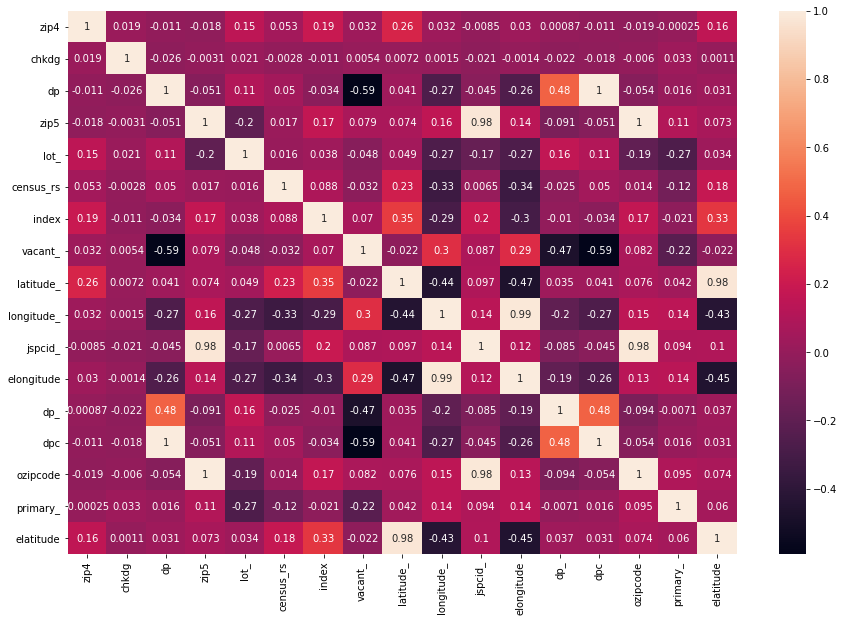

In [33]:
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(15, 10))
sn.heatmap(corrMatrix, annot=True)

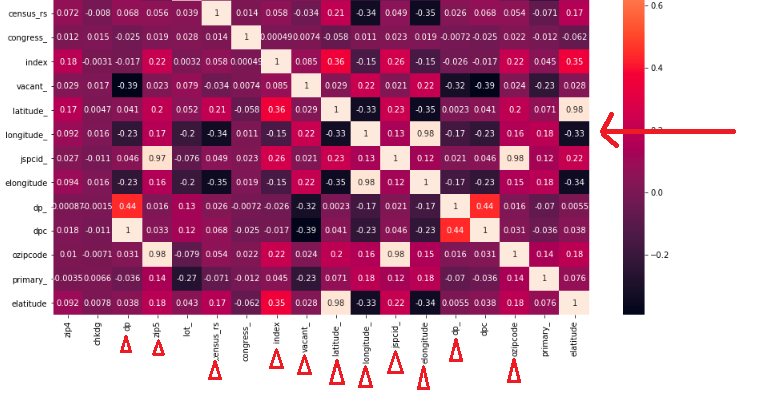

In [34]:
dfme.columns

Index(['latitude', 'longitude', 'open_date', 'type', 'geometry',
       'address_line_1', 'address_number', 'police_district', 'description',
       'name', 'address', 'zip4', 'chkdg', 'dp', 'zip5', 'ocity', 'dpv_',
       'lot_', 'barcode', 'oaddress', 'zip', 'last', 'census_rs', 'index',
       'timezone_', 'vacant_', 'latitude_', 'status_', 'longitude_',
       'ascdesc_', 'jspcid_', 'elongitude', 'city', 'dpvnotes_', 'suffix_',
       'dp_', 'countynm_', 'dpc', 'crrt', 'ozipcode', 'st', 'middle',
       'street_', 'errno_', 'ostate', 'primary_', 'elatitude', 'rdi_', 'first',
       'type_'],
      dtype='object')

In [35]:
#sn.pairplot(dfme[:50],vars=[ 'dp', 'zip5', 'census_rs', 'index','vacant_', 'latitude_', 'longitude_', 'jspcid_', 'elongitude','dp_', 'elatitude'])

In [36]:
#pd.plotting.scatter_matrix(df1[:50],diagonal='hist',figsize=(20,10))
#plt.show

In [37]:
#sn.pairplot(df1[:50],hue='vacant_',vars=['dp', 'zip5', 'census_rs', 'index','latitude_', 'longitude_', 'jspcid_', 'elongitude','dp_', 'elatitude'])

## Logistic Regression 

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
x = df1[['zip5', 'census_rs', 'index', 'latitude_', 'longitude_', 'jspcid_', 'elongitude','dp_', 'elatitude']]
y = df1['vacant_']

In [40]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
model.classes_

array([0., 1.])

In [42]:
print(model.intercept_)
model.coef_

[-6.45092472e-09]


array([[-7.04813284e-05, -5.35327181e-05,  8.24536537e-06,
        -3.15495910e-07,  5.46760800e-06,  4.94899432e-07,
         5.24853999e-06, -1.05136052e-02, -3.15890628e-07]])

### Evaluate the Model

In [43]:
model.predict_proba(x)

array([[0.87885932, 0.12114068],
       [0.86783846, 0.13216154],
       [0.81194304, 0.18805696],
       ...,
       [0.55018396, 0.44981604],
       [0.7352238 , 0.2647762 ],
       [0.73020385, 0.26979615]])

In [44]:
model.predict(x)

array([0., 0., 0., ..., 0., 0., 0.])

In [45]:
model.score(x, y)

0.6983897406228907

In [46]:
confusion_matrix(y, model.predict(x))

array([[6885,  747],
       [2381,  358]], dtype=int64)

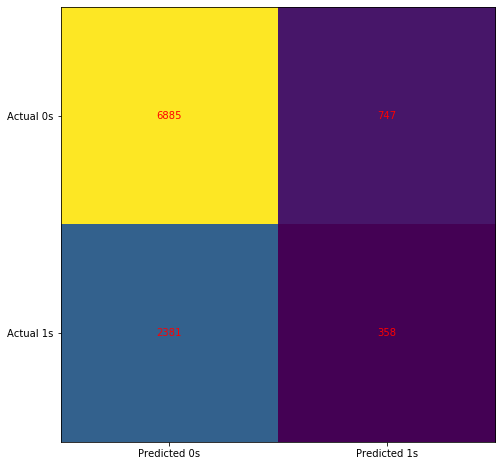

In [47]:
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [48]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

         0.0       0.74      0.90      0.81      7632
         1.0       0.32      0.13      0.19      2739

    accuracy                           0.70     10371
   macro avg       0.53      0.52      0.50     10371
weighted avg       0.63      0.70      0.65     10371



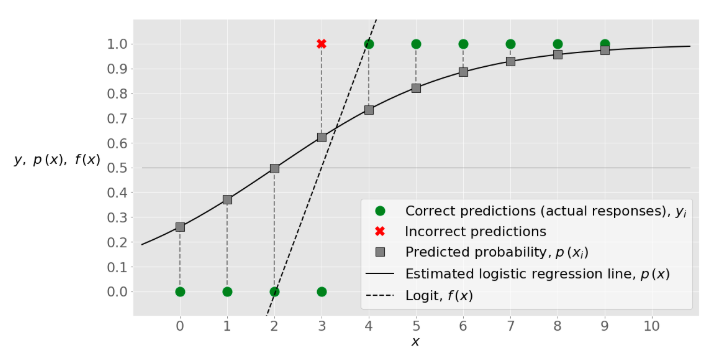

### Improve the Model

In [49]:
model = LogisticRegression(solver='newton-cg', C=1.0,random_state=0)
model.fit(x, y)

E:\anaconda3\envs\GEG584\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
E:\anaconda3\envs\GEG584\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
E:\anaconda3\envs\GEG584\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
E:\anaconda3\envs\GEG584\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
E:\anaconda3\envs\GEG584\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
print(model.intercept_)
print(model.coef_)
print(model.predict_proba(x))
model.predict(x)

[0.00905586]
[[ 5.75433164e-02  1.22626955e-02  1.10029847e-05  1.66451452e+00
   6.34837873e+00 -1.78846494e-05  5.85746227e+00 -1.01002230e-02
   1.69434784e+00]]
[[0.36150331 0.63849669]
 [0.89543367 0.10456633]
 [0.86263785 0.13736215]
 ...
 [0.29940208 0.70059792]
 [0.85455775 0.14544225]
 [0.72717299 0.27282701]]


array([1., 0., 0., ..., 1., 0., 0.])

In [51]:
print(model.score(x, y))
print(confusion_matrix(y, model.predict(x)))
print(classification_report(y, model.predict(x)))

0.7252916787195063
[[7024  608]
 [2241  498]]
              precision    recall  f1-score   support

         0.0       0.76      0.92      0.83      7632
         1.0       0.45      0.18      0.26      2739

    accuracy                           0.73     10371
   macro avg       0.60      0.55      0.55     10371
weighted avg       0.68      0.73      0.68     10371



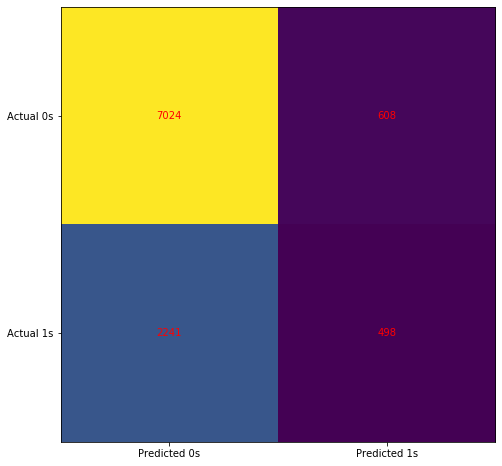

In [52]:
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

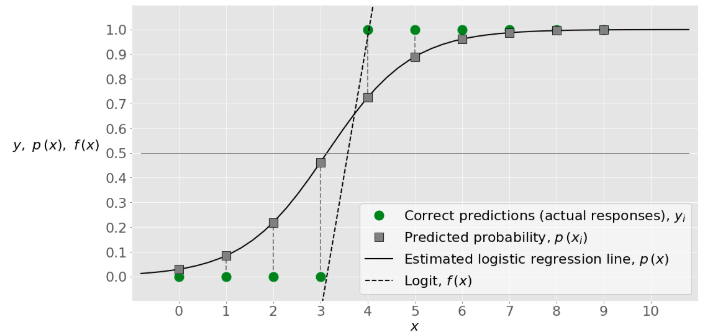

## new data set (mgdf)

In [53]:
x = dfme[[ 'zip5', 'census_rs', 'index', 'latitude_', 'longitude_', 'jspcid_', 'elongitude','dp_', 'elatitude']]
y = dfme['vacant_']
model2 = LogisticRegression(solver='liblinear', random_state=0)
model2.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
model2.classes_

array([0., 1.])

In [55]:
print(model2.intercept_)
model2.coef_

[3.05177006e-07]


array([[-3.24376146e-05, -1.17270325e-02,  7.09799147e-06,
        -8.16897239e-05,  8.02604923e-04,  4.65511036e-06,
         7.59135583e-04, -1.59860796e-02, -7.40220340e-05]])

In [56]:
model2.predict_proba(x)

array([[0.83567007, 0.16432993],
       [0.83567007, 0.16432993],
       [0.83567007, 0.16432993],
       ...,
       [0.8552552 , 0.1447448 ],
       [0.8552552 , 0.1447448 ],
       [0.8552552 , 0.1447448 ]])

In [57]:
model2.predict(x)

array([0., 0., 0., ..., 0., 0., 0.])

In [58]:
model2.score(x, y)

0.741425859060329

In [59]:
confusion_matrix(y, model2.predict(x))

array([[112250,  14737],
       [ 32384,  22863]], dtype=int64)

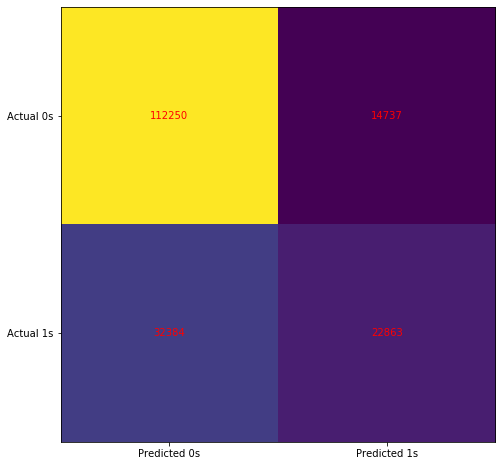

In [60]:
cm = confusion_matrix(y, model2.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [61]:
print(classification_report(y, model2.predict(x)))

              precision    recall  f1-score   support

         0.0       0.78      0.88      0.83    126987
         1.0       0.61      0.41      0.49     55247

    accuracy                           0.74    182234
   macro avg       0.69      0.65      0.66    182234
weighted avg       0.73      0.74      0.73    182234



## probability

In [62]:
from sklearn.gaussian_process.kernels import RBF
#from sklearn.linear_model import LogisticRegression
#from sklearn.gaussian_process import GaussianProcessClassifier
#from sklearn.svm import SVC

C = 10
kernel = 1.0 * RBF([1.0, 1.0])  # for GPC

# Create different classifiers.
classifiers = {
    'New Logistic Regression': model,
    'Old Logistic Regression': model2
}

n_classifiers = len(classifiers)

E:\anaconda3\envs\GEG584\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
E:\anaconda3\envs\GEG584\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
E:\anaconda3\envs\GEG584\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
E:\anaconda3\envs\GEG584\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
E:\anaconda3\envs\GEG584\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iteration

Accuracy (train) for New Logistic Regression: 75.8% 
Accuracy (train) for Old Logistic Regression: 74.1% 


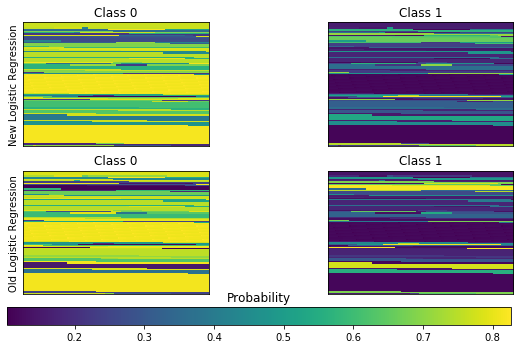

In [63]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

#plt.figure(figsize=(3 * 2, n_classifiers * 2))
plt.figure(figsize=(10, 5))
#plt.subplots_adjust(bottom=.2, top=.95)

Xfull = x

for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(x, y)

    y_pred = classifier.predict(x)
    accuracy = accuracy_score(y, y_pred)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))

    # View probabilities:
    probas = classifier.predict_proba(Xfull)
    n_classes = np.unique(y_pred).size
    for k in range(n_classes):
        plt.subplot(n_classifiers, n_classes, index * n_classes + k + 1)
        plt.title("Class %d" % k)
        if k == 0:
            plt.ylabel(name)
        imshow_handle = plt.imshow(probas[:12996, k].reshape((114, 114)),
                                   extent=(3, 9, 1, 5), origin='lower')
        plt.xticks(())
        plt.yticks(())
        
        #idx = (y_pred == k)
        #if idx.any():
            #plt.scatter(x[idx, 0], x[idx, 1], marker='o', c='w', edgecolor='k')

ax = plt.axes([0.15, 0.04, 0.7, 0.05])
plt.title("Probability")
plt.colorbar(imshow_handle, cax=ax, orientation='horizontal')

plt.show()

### export the CSV file

In [64]:
percentage=pd.DataFrame(model.predict_proba(x),columns=['NonZombie', 'Zombie'])
percentage

,NonZombie,Zombie
0,0.772690,0.227310
1,0.772690,0.227310
2,0.772690,0.227310
3,0.772690,0.227310
4,0.772690,0.227310
...,...,...
182229,0.928528,0.071472
182230,0.928528,0.071472
182231,0.928528,0.071472
182232,0.928528,0.071472


In [65]:
address=dfme["address"]
address

0            25 LISBON
1            25 LISBON
2            25 LISBON
3            25 LISBON
4            25 LISBON
              ...     
215637    519 RICHMOND
215638    519 RICHMOND
215639    519 RICHMOND
215641    519 RICHMOND
215643    519 RICHMOND
Name: address, Length: 182234, dtype: object

In [66]:
#he=pd.merge(percentage,address,left_on=index, right_on=index,how='inner')
he=percentage.join(address)

In [67]:
he=he.drop_duplicates()
he

,NonZombie,Zombie,address
0,0.772690,0.227310,25 LISBON
6,0.883302,0.116698,242 DEWITT
8,0.814826,0.185174,383 MACKINAW
15,0.814826,0.185174,NaN
50,0.818117,0.181883,383 MACKINAW
...,...,...,...
182216,0.326724,0.673276,1868 SENECA
182217,0.861070,0.138930,1868 SENECA
182218,0.861070,0.138930,NaN
182221,0.751800,0.248200,1868 SENECA


In [68]:
'''for x in he['Zombie']:
    if x>=0.5:
        he['IsZombie']="Y"
    else: 
        he['IsZombie']="N"'''

'for x in he[\'Zombie\']:\n    if x>=0.5:\n        he[\'IsZombie\']="Y"\n    else: \n        he[\'IsZombie\']="N"'

In [69]:
s1=he.loc[he.Zombie>=0.5]
#he.loc[he.Zombie<0.5].IsZombie='N'
s1["IsZombie"]='Y'
s2=he.loc[he.Zombie<0.5]
s2["IsZombie"]='N'

E:\anaconda3\envs\GEG584\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
E:\anaconda3\envs\GEG584\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [70]:
he = pd.concat( [s1,s2], axis=0 )

In [71]:
he

,NonZombie,Zombie,address,IsZombie
56,0.312258,0.687742,NaN,Y
58,0.312258,0.687742,383 MACKINAW,Y
68,0.312258,0.687742,241 LEMON,Y
74,0.312258,0.687742,54 CORNWALL,Y
91,0.189667,0.810333,54 CORNWALL,Y
...,...,...,...,...
182201,0.662307,0.337693,NaN,N
182217,0.861070,0.138930,1868 SENECA,N
182218,0.861070,0.138930,NaN,N
182221,0.751800,0.248200,1868 SENECA,N


In [72]:
#from google.colab import files

he.to_csv('Finaladdress.csv')
#files.download('Finaladdress_Boya.csv')

### Use model to predict unknown data

In [73]:
#unknown_X = Buf_unknown.drop(['vacant_','address'],axis=1)  
x = Buf_unknown[[ 'zip5', 'census_rs', 'index', 'latitude_', 'longitude_', 'jspcid_', 'elongitude','dp_', 'elatitude']]
x.dropna(how='any',inplace=True)
y=model2.predict(x)
data_percentage=model.predict_proba(x)

E:\anaconda3\envs\GEG584\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [74]:
x.shape

(27299, 9)

In [75]:
x.head()

,zip5,census_rs,index,latitude_,longitude_,jspcid_,elongitude,dp_,elatitude
0,14216.0,0,39302,42.9485,-78.862,58351,-78.862,0,42.9485
1,14216.0,0,39302,42.9485,-78.862,58351,-78.862,0,42.9485
2,14216.0,0,39302,42.9485,-78.862,58351,-78.862,0,42.9485
3,14216.0,0,39302,42.9485,-78.862,58351,-78.862,0,42.9485
4,14216.0,0,39302,42.9485,-78.862,58351,-78.862,0,42.9485


In [76]:
percentage=pd.DataFrame(data_percentage,columns=['NonZombie', 'Zombie'])
address=Buf_unknown[['address']]
he=percentage.join(address)
he=he.drop_duplicates()
s1=he.loc[he.Zombie>=0.5]
#he.loc[he.Zombie<0.5].IsZombie='N'
s1["IsZombie"]='Y'
s2=he.loc[he.Zombie<0.5]
s2["IsZombie"]='N'
he = pd.concat( [s1,s2], axis=0 )
he

E:\anaconda3\envs\GEG584\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
E:\anaconda3\envs\GEG584\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,NonZombie,Zombie,address,IsZombie
885,0.344789,0.655211,14 EATON,Y
909,0.344789,0.655211,768 DIVISION,Y
914,0.344789,0.655211,89 LEONARD,Y
961,0.431664,0.568336,56 PARADE,Y
990,0.466919,0.533081,83 KING,Y
...,...,...,...,...
27254,0.552120,0.447880,285 RICHMOND,N
27260,0.684940,0.315060,285 RICHMOND,N
27263,0.769731,0.230269,285 RICHMOND,N
27264,0.536765,0.463235,285 RICHMOND,N


In [77]:
he.dropna(how='any',inplace=True)
he.drop_duplicates(subset='address',inplace=True)
he.shape

(375, 4)

In [78]:
he.to_csv('DT-Finaladdress.csv')

In [79]:
he.head()

,NonZombie,Zombie,address,IsZombie
885,0.344789,0.655211,14 EATON,Y
909,0.344789,0.655211,768 DIVISION,Y
914,0.344789,0.655211,89 LEONARD,Y
961,0.431664,0.568336,56 PARADE,Y
990,0.466919,0.533081,83 KING,Y
